In [34]:
import pandas as pd
import numpy as np

# 주요 라이브러리 import
import warnings
warnings.filterwarnings('ignore')
import time
from IPython.display import Image
from sklearn.datasets import fetch_openml
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#라벨인코더 임포트
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from pandas.plotting import parallel_coordinates#코디네이츠 그래프 그릴 때 필요한 라이브러리
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier#모델링 중 하나
#cross_val_score: 다양한 셈플링을 해서 여러번 테스트-->평균치를 구해본다.
from sklearn.model_selection import cross_val_score#crossvaludation해주는거
from sklearn.metrics import *

from sklearn.model_selection import GridSearchCV#그리드서치
from sklearn.preprocessing import StandardScaler #표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
#이거 임포트 해줘야 차트에서 오류안남!!! 한글파일때문에 오류나는거.
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/malgun.ttf'#윈도우안에있는 폰트파일주소.
#font_location = '../NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [35]:
from sklearn.datasets import load_iris

In [36]:
iris = load_iris()
print(type(iris))
iris

<class 'sklearn.utils.Bunch'>


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [37]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [38]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [39]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
len(iris.data)

150

In [41]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [42]:
df = pd.DataFrame(columns = iris.feature_names, data = iris.data)

In [43]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
#Df의 DTYPE을 확인해보자.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [46]:
#시각화 할 때 species컬럼의 행들의 이름을 종이름으로 바꿔보자.
#일단 species컬럼의 타입을 category로 바꾸자.
#그 후 rename_category함수를 써서 원래 종 이름으로 바꿔주자.

In [47]:
df['species'] = pd.Series(iris.target, dtype = 'category')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [49]:
df['species'] = df['species'].cat.rename_categories(iris.target_names)
df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [50]:
df.groupby('species').size

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002867C102CD0>>

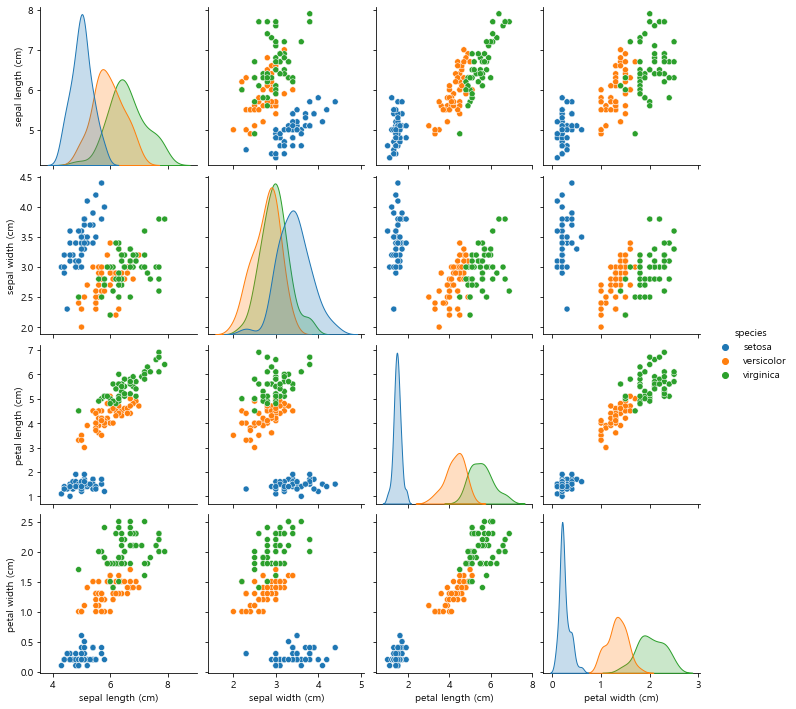

In [51]:
sns.pairplot(df, hue = 'species')

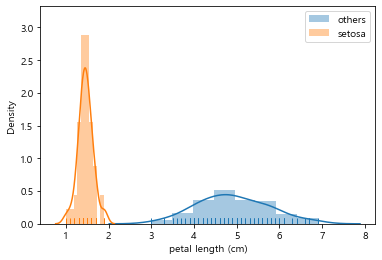

In [54]:
# petal length: 꽃잎 길이
sns.distplot(df[df.species != 'setosa']['petal length (cm)'], hist=True, rug=True, label='others')
sns.distplot(df[df.species == 'setosa']['petal length (cm)'], hist=True, rug=True, label='setosa')
plt.legend()#범례
plt.show()


In [55]:
#꽃잎의 길이가 작은 것들은 setosa라는 것을 알 수 있다.

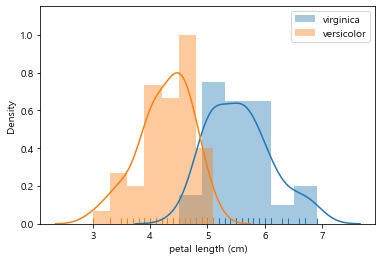

In [56]:
sns.distplot(df[df.species == "virginica"]["petal length (cm)"], hist=True, rug=True, label="virginica")
sns.distplot(df[df.species == "versicolor"]["petal length (cm)"], hist=True, rug=True, label="versicolor")
plt.legend()
plt.show()

In [58]:
#virginica가 versicolor보다 꽃잎의 길이가 대체적으로 더 길다.
# 하지만 길다고 무조건 virginica라고 할 수는 없다.(판별할 수 있는 기준은 아님)

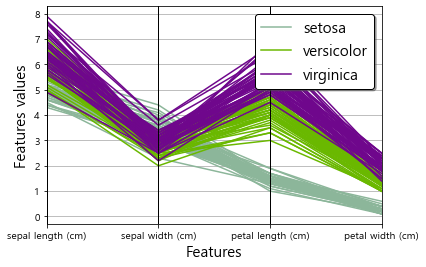

In [63]:
parallel_coordinates(df, 'species')#(데이터프래임,'컬럼명')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size':15}, frameon=True, 
           shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [64]:
## sepal length, sepal width 각각 항목별로 꽃들이 어떤 차이를 가지는지 값의 범위를 표준화시켜 비교해보자.
##StandardScaler()와 MinMaxScaler()

In [65]:
ss = StandardScaler()#표준(평균값 기준)
#표준화를 기준으로 인코딩을 해보자.

In [67]:
# 데이터에 머신러닝 모델을 맞추는 것(fit)
#fit_transform: train data에 적용하여
#train data의 mean, variance를 학습시킴.
#train data로 학습된 Scaler()의 parameter를 통해
#test data의 feature값들이 스케일링 됨.
#따라서 fit_transtorm은 train data에만 적용
#test data에도 적용시키면 mean, variance의 값들이 달라짐.
ss.fit_transform(df.iloc[:,:-1])
#표준화된 값들이 아래에 array(2차열)로 배열됨

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [75]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [71]:
#정규화를 시켰으니,
#훈련시켜보자.
X_train, X_test ,y_train, y_test = train_test_split(
        df.iloc[:,:-1],
        df.iloc[:,-1],
        test_size=0.2,
        random_state=41
)

In [72]:
print('X_train: ',X_train.shape, 'y_train: ',y_train.shape, 'X_test: ',X_test.shape,'y_test: ',y_test.shape)


X_train:  (120, 4) y_train:  (120,) X_test:  (30, 4) y_test:  (30,)


In [73]:
y_test.value_counts()

versicolor    11
virginica     10
setosa         9
Name: species, dtype: int64

In [76]:
ss_X_train= ss.fit_transform(X_train)

In [ ]:
#표준화된 값들을 df로 만들어 보자.
X_train_s = pd.DataFrame(ss_X_train, columns=)